<a href="https://colab.research.google.com/github/Abhinav-Chaturvedi-095/Movie_Recommendation_system/blob/main/sigmoid_kernel_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
credits = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies dataset/tmdb_5000_movies.csv")

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies.merge(credits,on='title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


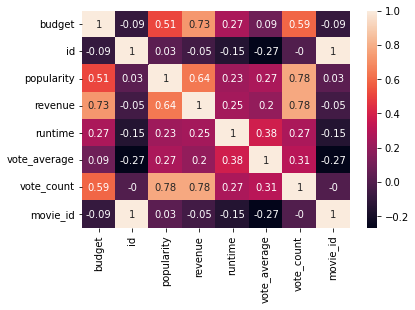

In [ ]:
matrix = movies.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

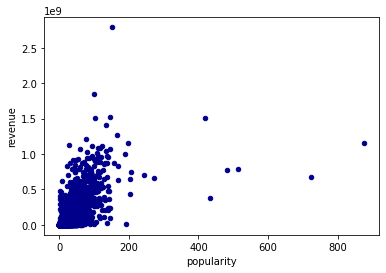

In [ ]:
ax1 = movies.plot.scatter(x='popularity',y='revenue',c='DarkBlue')

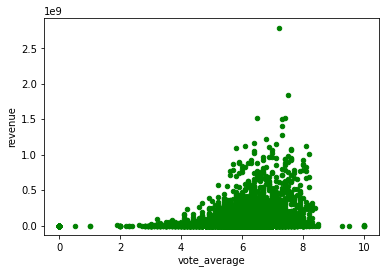

In [ ]:
ax2 = movies.plot.scatter(x='vote_average',y='revenue',c='Green')


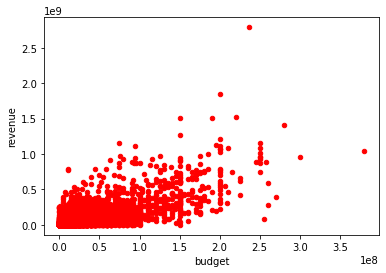

In [ ]:
ax2 = movies.plot.scatter(x='budget',y='revenue',c='Red')

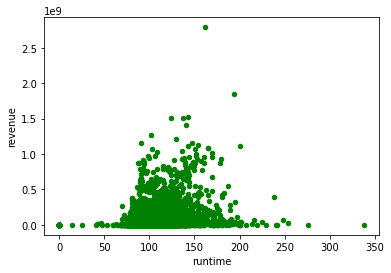

In [ ]:
ax2 = movies.plot.scatter(x='runtime',y='revenue',c='Green')

#Demographic

In [ ]:
v=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
m=movies['vote_count'].quantile(0.70)

In [ ]:
movies['weighted_average']=((R*v)+ (C*m))/(v+m)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
movie_top=movies.sort_values('weighted_average',ascending=False)
movie_top[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1887,The Shawshank Redemption,8205,8.5,8.340798,136.747729
3342,The Godfather,5893,8.4,8.192918,143.659698
662,Fight Club,9413,8.3,8.171668,146.757391
3237,Pulp Fiction,8428,8.3,8.157637,121.463076
65,The Dark Knight,12002,8.2,8.102690,187.322927
809,Forrest Gump,7927,8.2,8.056083,138.133331
1824,Schindler's List,4329,8.3,8.038788,104.469351
3872,Whiplash,4254,8.3,8.034736,192.528841
96,Inception,13752,8.1,8.018625,167.583710
1996,The Empire Strikes Back,5879,8.2,8.010457,78.517830


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Movie Title')

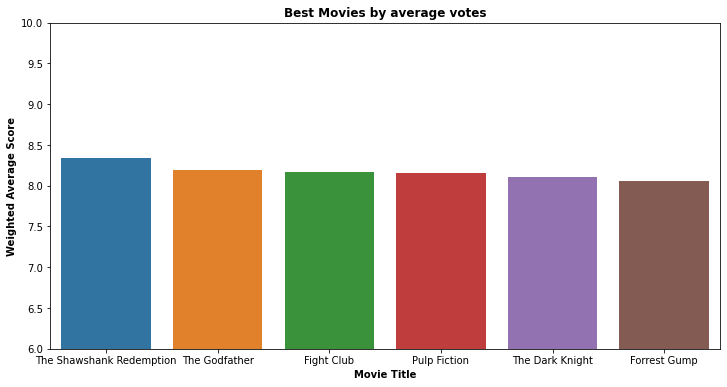

In [ ]:
weighted_average=movie_top.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(y=weighted_average['weighted_average'].head(6), x=weighted_average['original_title'].head(6), data=weighted_average)
plt.ylim(6, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.ylabel('Weighted Average Score', weight='bold')
plt.xlabel('Movie Title', weight='bold')

Text(0, 0.5, 'Movie Title')

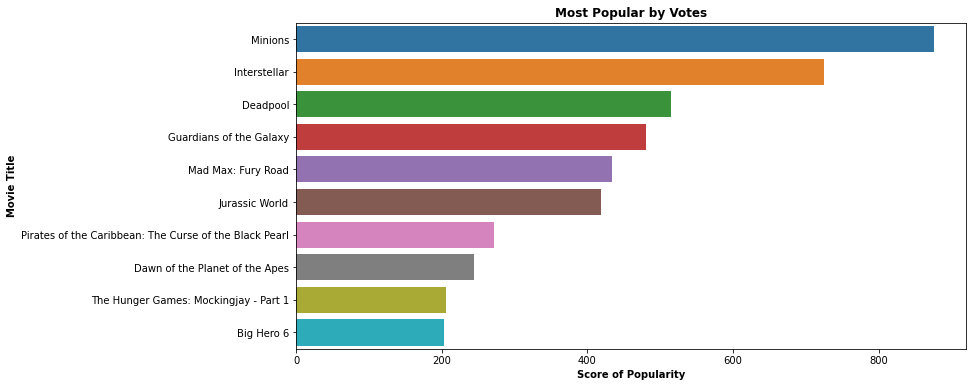

In [ ]:
popularity=movie_top.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674322,0.171815
1,0.581388,0.158846
2,0.436251,0.122635
3,0.773043,0.128272
4,0.387725,0.050169


In [ ]:
movies[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029,0.674322,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666,0.581388,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115,0.436251,0.122635
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585,0.773043,0.128272
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392,0.387725,0.050169


In [ ]:
movies['score'] = movies['normalized_weight_average'] * 0.5 + movies['normalized_popularity'] * 0.5 #average of both
movies_scored_df = movies.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906433,0.827162,0.866798
546,Minions,0.460609,1.000000,0.730305
94,Guardians of the Galaxy,0.851866,0.549462,0.700664
788,Deadpool,0.725203,0.587690,0.656446
127,Mad Max: Fury Road,0.670957,0.495989,0.583473
1887,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934986,0.213941,0.574464
3872,Whiplash,0.916432,0.219887,0.568159
3342,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953820,0.167611,0.560716


Text(0, 0.5, 'Movie Title')

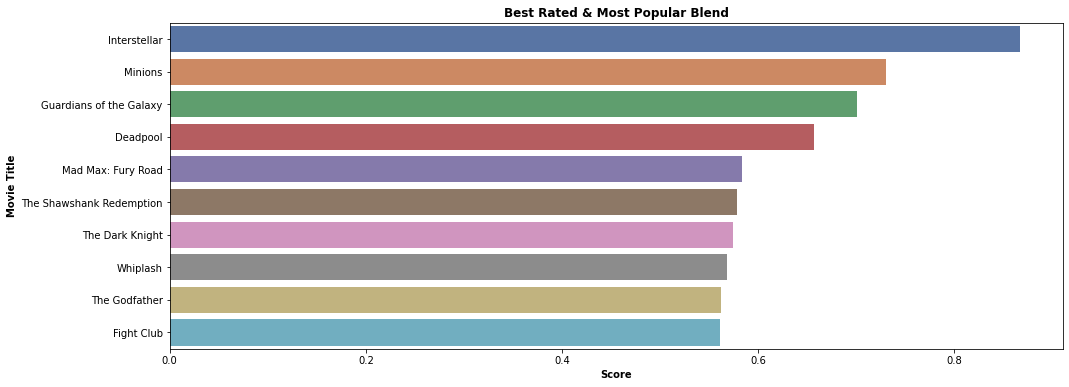

In [ ]:
scored_df = movies.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_average,normalized_weight_average,normalized_popularity,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029,0.674322,0.171815,0.423068
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666,0.581388,0.158846,0.370117
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115,0.436251,0.122635,0.279443
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585,0.773043,0.128272,0.450658
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392,0.387725,0.050169,0.218947


In [ ]:
## Features in our system- Genre,id,keywords,title,overview,cast,crew

movie_df = movies[['movie_id','title','genres','cast','crew','keywords','overview','original_language','score']]
movie_df.head(2)

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",en,0.370117


In [ ]:
movie_df.isna().sum()

movie_id             0
title                0
genres               0
cast                 0
crew                 0
keywords             0
overview             3
original_language    0
score                0
dtype: int64

In [ ]:
## dropping missing vals
movie_df.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
movie_df.isnull().sum()

movie_id             0
title                0
genres               0
cast                 0
crew                 0
keywords             0
overview             0
original_language    0
score                0
dtype: int64

In [ ]:
## taking genre
import ast
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
            L.append(i['name'])
            break
    return L

## taking director from crew
import ast
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

##taking top 5 actors
def cast(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter != 5:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

##taking keywords
def keywords(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [ ]:
movie_df['genres'] = movie_df['genres'].apply(convert)
movie_df['crew'] = movie_df['crew'].apply(fetch_director)
movie_df['cast'] = movie_df['cast'].apply(cast)
movie_df['keywords'] = movie_df['keywords'].apply(keywords)
# converting overview in list form
movie_df['overview'] = movie_df['overview'].apply(lambda x: x.split())

movie_df.head(2)

<ipython-input-36-c5be88a08749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].apply(convert)
<ipython-input-36-c5be88a08749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['crew'] = movie_df['crew'].apply(fetch_director)
<ipython-input-36-c5be88a08749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,[Action],"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,[Adventure],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",en,0.370117


In [ ]:
### Removing spaces 

movie_df['crew'] = movie_df['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['genres'] = movie_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['keywords'] = movie_df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['cast'] = movie_df['cast'].apply(lambda x:[i.replace(" ","") for i in x])

<ipython-input-37-c38477a6f289>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['crew'] = movie_df['crew'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-37-c38477a6f289>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-37-c38477a6f289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
movie_df.head(5)

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,[Action],"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,[Adventure],"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",en,0.370117
2,206647,Spectre,[Action],"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",en,0.279443
3,49026,The Dark Knight Rises,[Action],"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",en,0.450658
4,49529,John Carter,[Action],"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",en,0.218947


In [ ]:
movie_df['tags'] = movie_df['overview']+movie_df['genres']+movie_df['keywords']+movie_df['cast']+movie_df['crew']

<ipython-input-39-27da33499e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['tags'] = movie_df['overview']+movie_df['genres']+movie_df['keywords']+movie_df['cast']+movie_df['crew']


In [ ]:
new_df = movie_df[['movie_id','title','tags','score']]
new_df.head(2)

,movie_id,title,tags,score
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",0.423068
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",0.370117


In [ ]:
##converting it into string
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

<ipython-input-41-70b4420d2fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))


In [ ]:
new_df.head(2)


,movie_id,title,tags,score
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.423068
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",0.370117


In [ ]:
## converting tags to lower
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-43-cd24d8e918ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
##Removing Stopwords from tags
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(t for t in x.split() if t not in allstopwords))

<ipython-input-45-dade3e89d2fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(t for t in x.split() if t not in allstopwords))


In [ ]:
new_df.head()

,movie_id,title,tags,score
0,19995,Avatar,"22nd century, paraplegic marine dispatched moo...",0.423068
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed dead, come bac...",0.370117
2,206647,Spectre,cryptic message bond’s past sends trail uncove...,0.279443
3,49026,The Dark Knight Rises,"following death district attorney harvey dent,...",0.450658
4,49529,John Carter,"john carter war-weary, former military captain...",0.218947


In [ ]:
from nltk.stem.snowball import SnowballStemmer
  
#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='english')

In [ ]:
## Stemming
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join([snow_stemmer.stem(word) for word in x.split()]))

<ipython-input-48-692c09908d24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join([snow_stemmer.stem(word) for word in x.split()]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(new_df['tags']).toarray()
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectors.shape

(4806, 5000)

In [ ]:
new_df.head()

,movie_id,title,tags,score
0,19995,Avatar,"22nd century, parapleg marin dispatch moon pan...",0.423068
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ dead, come back ...",0.370117
2,206647,Spectre,cryptic messag bond past send trail uncov sini...,0.279443
3,49026,The Dark Knight Rises,"follow death district attorney harvey dent, ba...",0.450658
4,49529,John Carter,"john carter war-weary, former militari captain...",0.218947


In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(vectors, vectors)
sig

array([[0.76167814, 0.76159416, 0.76159633, ..., 0.76159581, 0.76159416,
        0.76159416],
       [0.76159416, 0.76167814, 0.76159524, ..., 0.7615953 , 0.76159416,
        0.76159416],
       [0.76159633, 0.76159524, 0.76167814, ..., 0.76159558, 0.76159416,
        0.76159416],
       ...,
       [0.76159581, 0.7615953 , 0.76159558, ..., 0.76167814, 0.76159592,
        0.76159654],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159592, 0.76167814,
        0.76159675],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159654, 0.76159675,
        0.76167814]])

In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

In [ ]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [ ]:
import operator

def suggest_sig(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = sig[movie_index]
    score=new_df['score']
    df=pd.DataFrame(distances,columns=['similarity'])
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    




    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()
    
#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break

In [ ]:
suggest_sig('Spectre')

Enter Movie: Spectre

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


In [ ]:
suggest_sig('The Avengers')

Enter Movie: The Avengers

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


In [ ]:
suggest_sig('Pirates of the Caribbean: At World\'s End')

Enter Movie: Pirates of the Caribbean: At World's End

Recommendations: 
  Pirates of the Caribbean: Dead Man's Chest
  Pirates of the Caribbean: The Curse of the Black Pearl
  20,000 Leagues Under the Sea
  Pirates of the Caribbean: On Stranger Tides
  Life of Pi


In [ ]:
suggest_sig('The Dark Knight Rises')

Enter Movie: The Dark Knight Rises

Recommendations: 
  The Dark Knight
  Batman Returns
  Batman Begins
  Batman
  Batman Forever


In [ ]:
suggest_sig('Spider-Man 3')

Enter Movie: Spider-Man 3

Recommendations: 
  Spider-Man
  Spider-Man 2
  Arachnophobia
  The Amazing Spider-Man
  The Amazing Spider-Man 2


In [ ]:
suggest_sig('Harry Potter and the Half-Blood Prince')

Enter Movie: Harry Potter and the Half-Blood Prince

Recommendations: 
  Harry Potter and the Order of the Phoenix
  Harry Potter and the Goblet of Fire
  Harry Potter and the Prisoner of Azkaban
  Harry Potter and the Philosopher's Stone
  Harry Potter and the Chamber of Secrets
